<a href="https://colab.research.google.com/github/Khrons/Kaggle-Science/blob/master/House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Prices Competition

O Housing Prices é uma competição do Kaggle com o objetivo de uso do Machine Learning/Aprendizado de Máquinas para a prática dos estudantes da área. O competidor visa predizer os valores finais de cada casa (dado um conjunto de dados para teste). 

Mas nesse artigo vamos por um outro caminho, através da visualização dos dados. 
Iremos descobrir qual é a casa (ou mansão) que possui o valor mais alto de venda e porque conseguiu ser vendida a esse preço. 

In [6]:
# Importa as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [4]:
# Colocando os dados em um DataFrame
url = 'https://raw.githubusercontent.com/Khrons/Kaggle-Science/master/data/train.csv'
df1 = pd.read_csv(url)

# **Qual é a casa mais valiosa?**

---



Pela descrição dos valores das casas, temos que a casa mais valiosa está no valor de **755 mil**. E 75% dos valores estão abaixo de 214 mil. 


In [3]:
df1['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64



*O que faz essa casa ser tão valiosa?*
Vamos dar uma olhada em suas propriedades

In [4]:
df1.loc[df1['SalePrice'] == 755000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,...,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


A casa 692 possui um LotArea de cerca de **20 mil metros quadrados** (do tamanho de uma chacára grande). A propriedade também está em uma *zona mais afastada* do centro, possui a *rua pavimentada*, foi *recentemente construída e remodelada*, possui instalação de *aquecimento a gás* e *circulação central*. Com 5 *banheiros* e 4 *quartos*, 1 *cozinha*, 2 *lareiras*, uma *garagem* com capacidade para três carros e uma *piscina* de 15 metros.

**Teoria:**

*   *A LotArea da casa 692 é a maior ou uma das maiores e isso por si só justificaria o valor?*



In [37]:
df1['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

De fato, a casa 692 é um dos maiores lotes do conjunto de dados, já que 75% dos dados estão abaixo de 11601 pés quadrados (e ela tem 21535 pés quadrados). 
---
**Porém, não é o maior lote**. Inclusive o maior lote é quase *10 vezes maior* que a casa 692 (maior que o Estádio do Maracanã) e foi vendida por um preço *2 vezes menor*. Então, quais são os fatores que levam uma casa ser tão valorizada?

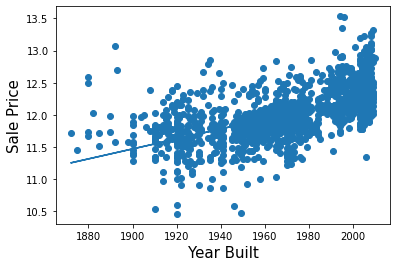

In [25]:
fig, ax = plt.subplots()
y  = df1['SalePrice']
x = df1['YearBuilt']

m, b = np.polyfit((df1['YearBuilt']),np.log(df1['SalePrice']), 1)
plt.scatter(x, np.log(y))

plt.xlabel("Year Built", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)

plt.plot(df1['YearBuilt'], m*df1['YearBuilt'] + b)
plt.show()

# **Apêndice 1: Descrição dos Dados**

---

*Como os dados estão estruturados:*


*   **Id**: Número gerado para a identificação da propriedade
*   **MSSubClass**: Tipo de propriedade
*   **MsZoning**: Tipo de zona local
*   **LotFrontage**: Tamanho da rua conectado à propriedade (Em pés)
*   **LotArea**: Tamanho do lote (Em Pé Quadrado)
*   **Street**: Tipo de estrada que possui em frente a propriedade
*   **Alley**: Tipo de interligação da propriedade (becos)
*   **LotShape**: Estrutura geral da propriedade
*   **LandContour**: Nivelamento da propriedade
*   **Utilities**: Tipo de utilitários disponíveis
*   **LotConfig**: Configuração do Lote
*   **LandSlope**: Declive da propriedade
*   **Neighborhood**: Localizações físicas dentro dos limites da cidade
*   **Condition1**: Proximidade de várias condições
*   **Condition2**: Proximidade de várias condições (se mais de uma estiver presente)
*   **BldgType**: Tipo de moradia
*   **HouseStyle**: Estilo de moradia
*   **OverallQual**: Avalia o material geral e acabamento da casa
*   **YearBuilt**: Data original da construção
*   **YearRemodAdd**: Data de remodelação (igual à data de construção, se não houver remodelação ou acréscimos)
*   **RoofStyle**: Tipo do teto
*   **RoofMatl**: Material do teto
*   **Exterior1st**: Cobertura externa interna
*   **Exterior2nd**: Cobertura externa interna (se houver mais de um material)
*   **MasVnrType**: Tipo de folheado de alvenaria
*   **MasVnrArea**: Área de folheado de alvenaria (Em Pés Quadrados)
*   **ExterQual**: Avalia a qualidade do material no exterior 
*   **ExterCond**: Avalia a condição atual do material no exterior
*   **Foundation**: Tipo de Fundação
*   **BsmtQual**: Qualidade da altura do Porão
*   **BsmtCond**: Estado geral do Porão
*   **BsmtExposure**: Refere-se a exposição em paredes no nível do jardim
*   **BsmtFinType1**: Classificação da área acabada do porão
*   **BsmtFinSF1**: Tipo 1 finalizado (Em Pés Quadrados)
*   **BsmtFinType2**: Classificação da área acabada do porão (se houver vários)
*  **BsmtFinSF2**: Tipo 2 finalizado (Em Pés Quadrados)
*   **BsmtUnfSF**: Área não finalizada do Porão (Em Pés Quadrados)
*   **TotalBsmtSF**: Área Total do Porão (Em Pés Quadrados)
*   **Heating**: Tipo de aquecimento
*   **HeatingQC**: Qualidade do aquecimento e condição 
*   **CentralAir**: Ar condicionado central
*   **Electrical**: Sistema Elétrico
*   **1stFlrSF**: Tamanho do primeiro andar (Em Pés Quadrados)
*   **2ndFlrSF**: Tamanho do segundo andar (Em Pés Quadrados)
*   **LowQualFinSF**: Acabamentos de baixa qualidade na casa(Em Pés Quadrados)
*   **GrLivArea**: Área de estar acima do nível (Em Pés Quadrados)
*   **BsmtFullBath**: Banheiros grandes no porão
*   **BsmtHalfBath**: Banheiros pequenos no porão
*   **FullBath**: Banheiros grandes acima do nível
*   **HalfBath**: Banheiros pequenos acima do nível
*   **Bedroom**: Quartos acima do nível (Não inclui quartos em porão)
*   **Kitchen**: Cozinhas acima do nível
*   **KitchenQual**: Qualidade da Cozinha
*   **TotRmsAbvGrd**: Total de quartos acima do nível (Não inclui banheiros)
*   **Functional**: Funcionalidade da Propriedade
*   **Fireplaces**: Número de Lareiras
*   **FireplaceQu**: Qualidade da Lareira
*   **GarageType**: Local da Garagem
*   **GarageYrBlt**: Ano que a garagem foi construída
*   **GarageFinish**: Situação do interior da garagem
*  **GarageCars**: Tamanho da Garagem para a capacidade de carros
*   **GarageArea**: Tamanho da Garagem (Em Pés Quadrados)
*   **GarageQual**: Qualidade da Garagem
*   **GarageCond**: Condição da Garagem
*   **PavedDrive**: Caminho pavimentado
*   **WoodDeckSF**: Área coberta de madeira (Em Pés Quadrados)
*   **OpenPorchSF**: Área de Varanda Aberta (Em Pés Quadrados)
*   **EnclosedPorch**: Área de Varanda Fechada (Em Pés Quadrados)
*   **3SsnPorch**: Área de Varanda Three season (Em Pés Quadrados)
*   **ScreenPorch**: Área da Varanda com Tela (Em Pés Quadrados)
*   **PoolArea**: Área da Piscina (Em Pés Quadrados)
*   **PoolQC**: Qualidade da Piscina
*   **Fence**: Qualidade da Cerca
*   **MiscFeature**: Recursos diversos não cobertas por outras categorias
*   **MiscVal**: Valor de recursos diversos
*  **MoSold**: Mês da venda (MM)
*   **YrSold**: Ano da venda (YYYY)
*   **SaleType**: Tipo de venda
*   **SaleCondition**: Condição para venda
*   **SalePrice**: Preço de venda da Propriedade
